In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
df = pd.read_csv("/content/sample_data/Country-data.csv") #this data is taken from Kaggle
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#Manual Preprocessing

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


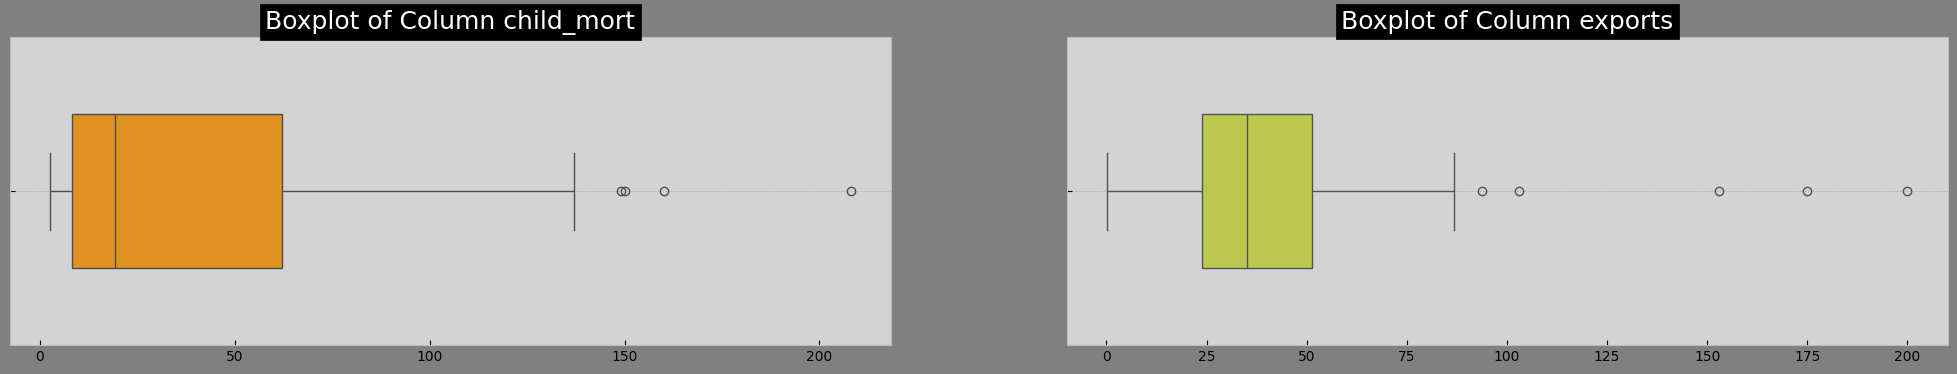

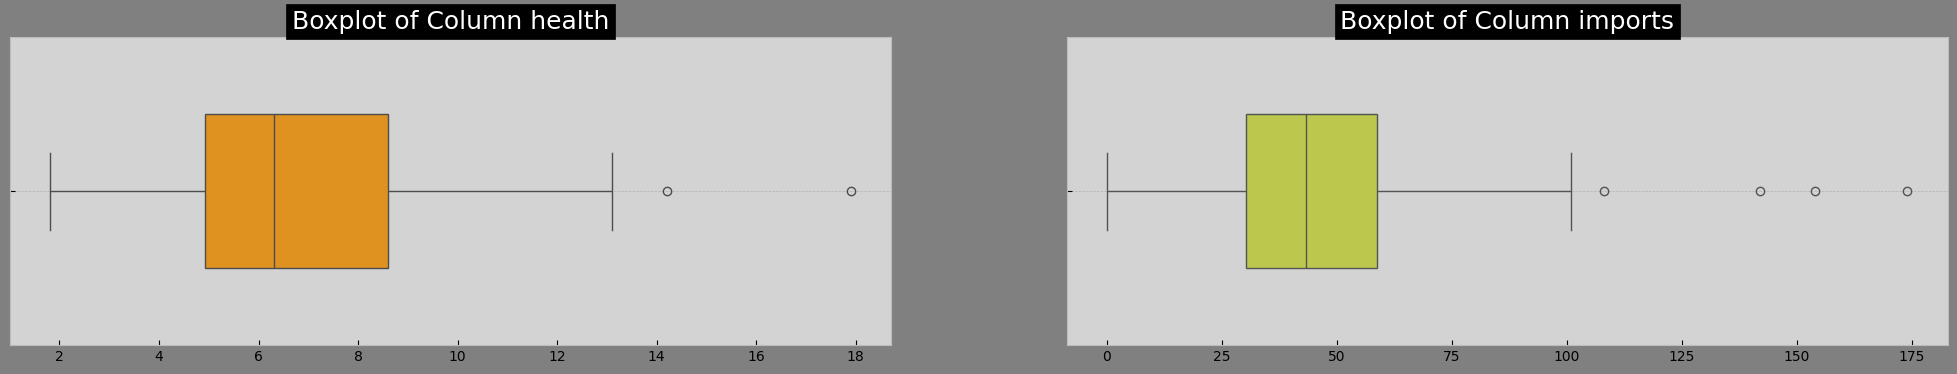

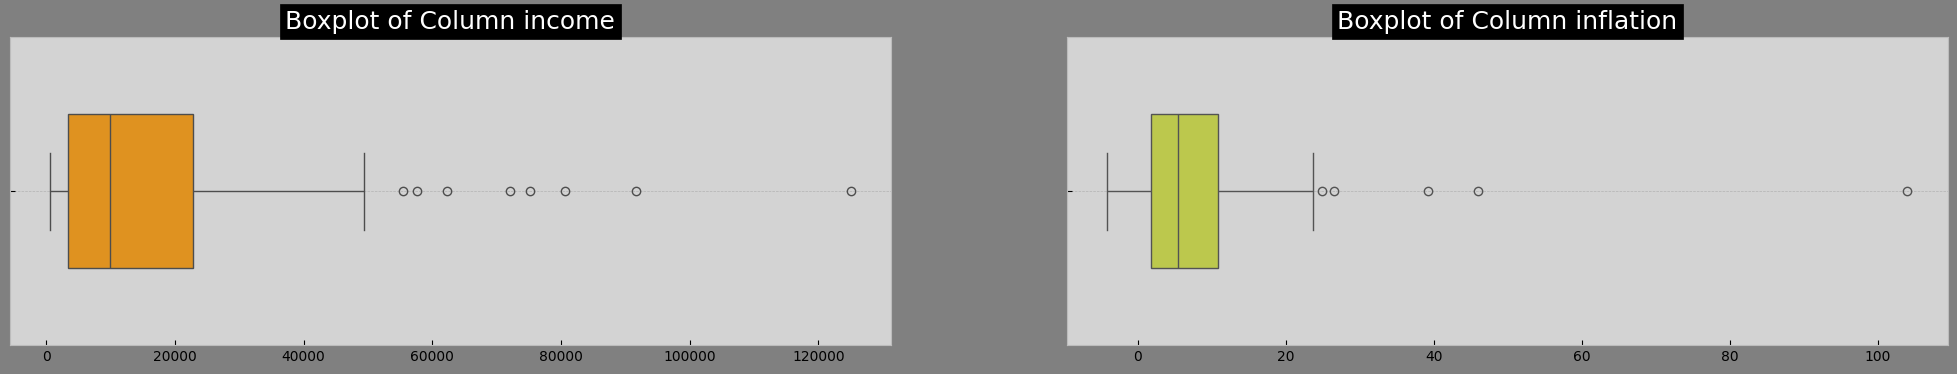

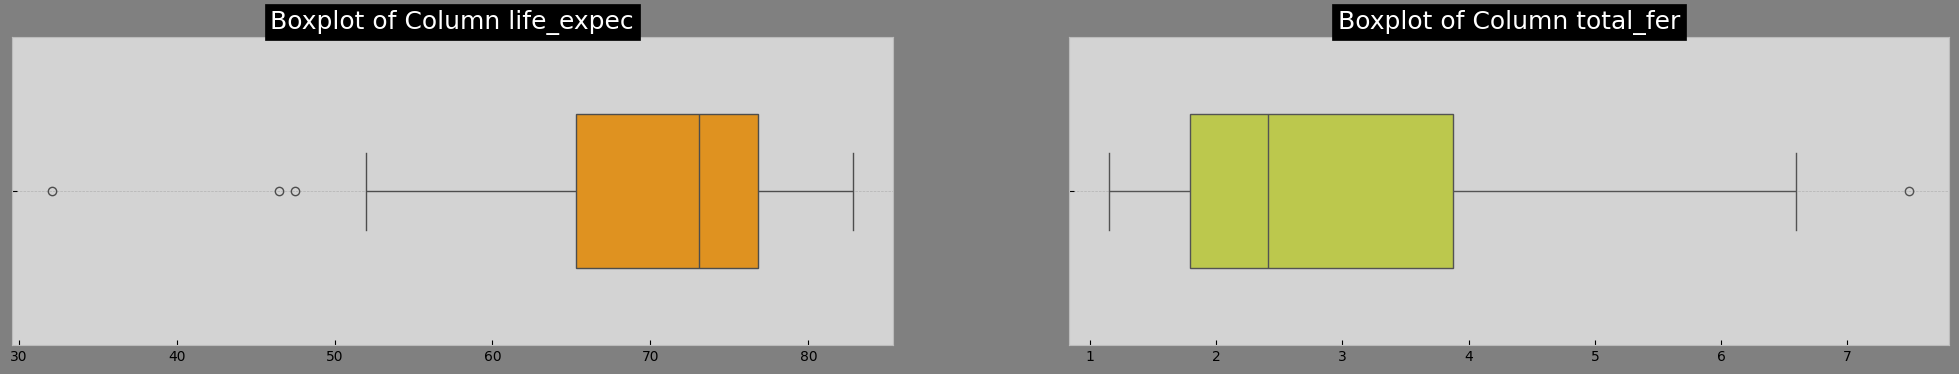

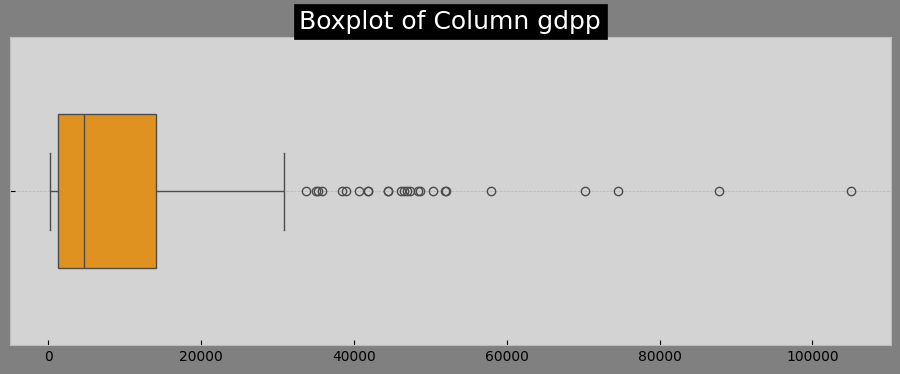

In [ ]:
#Using Box plots
df_box = list (df.drop ("country", axis = 1))
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='gray')

    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, color = "#ff9800", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('lightgrey')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df , color = "#cddc39", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('lightgrey')
        plt.grid()
        i += 1

    plt.show()

<ipython-input-23-abcacabb41c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


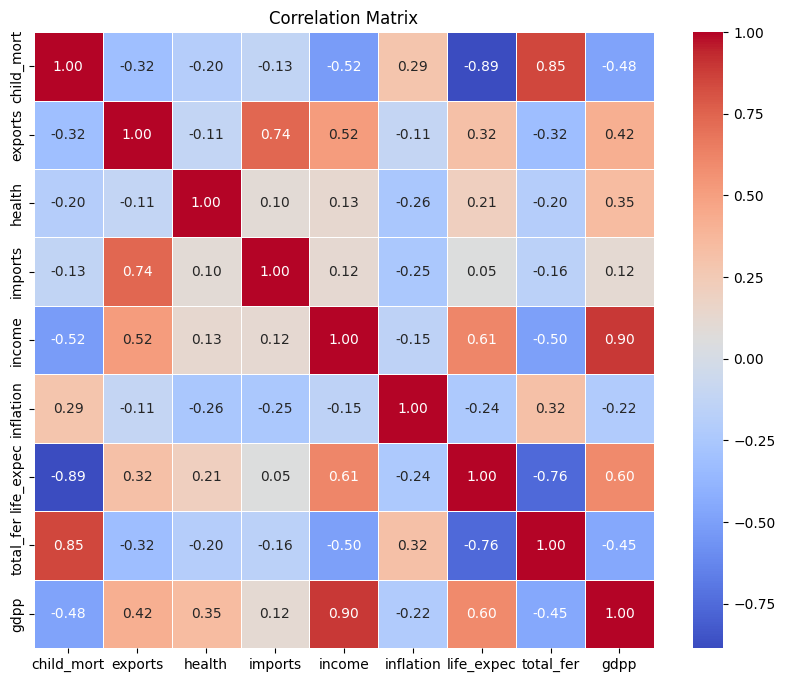

In [ ]:
# Plot the correlation matrix using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#other way using world map
df_map = list (df.drop ("country", axis = 1))
for c in df_map:

    fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color= c ,
                    title='Coutries by ' + c ,
                    color_continuous_scale = 'Reds'
                   )

    fig.update_layout(
        paper_bgcolor='lightgrey'
    )

    fig.show()

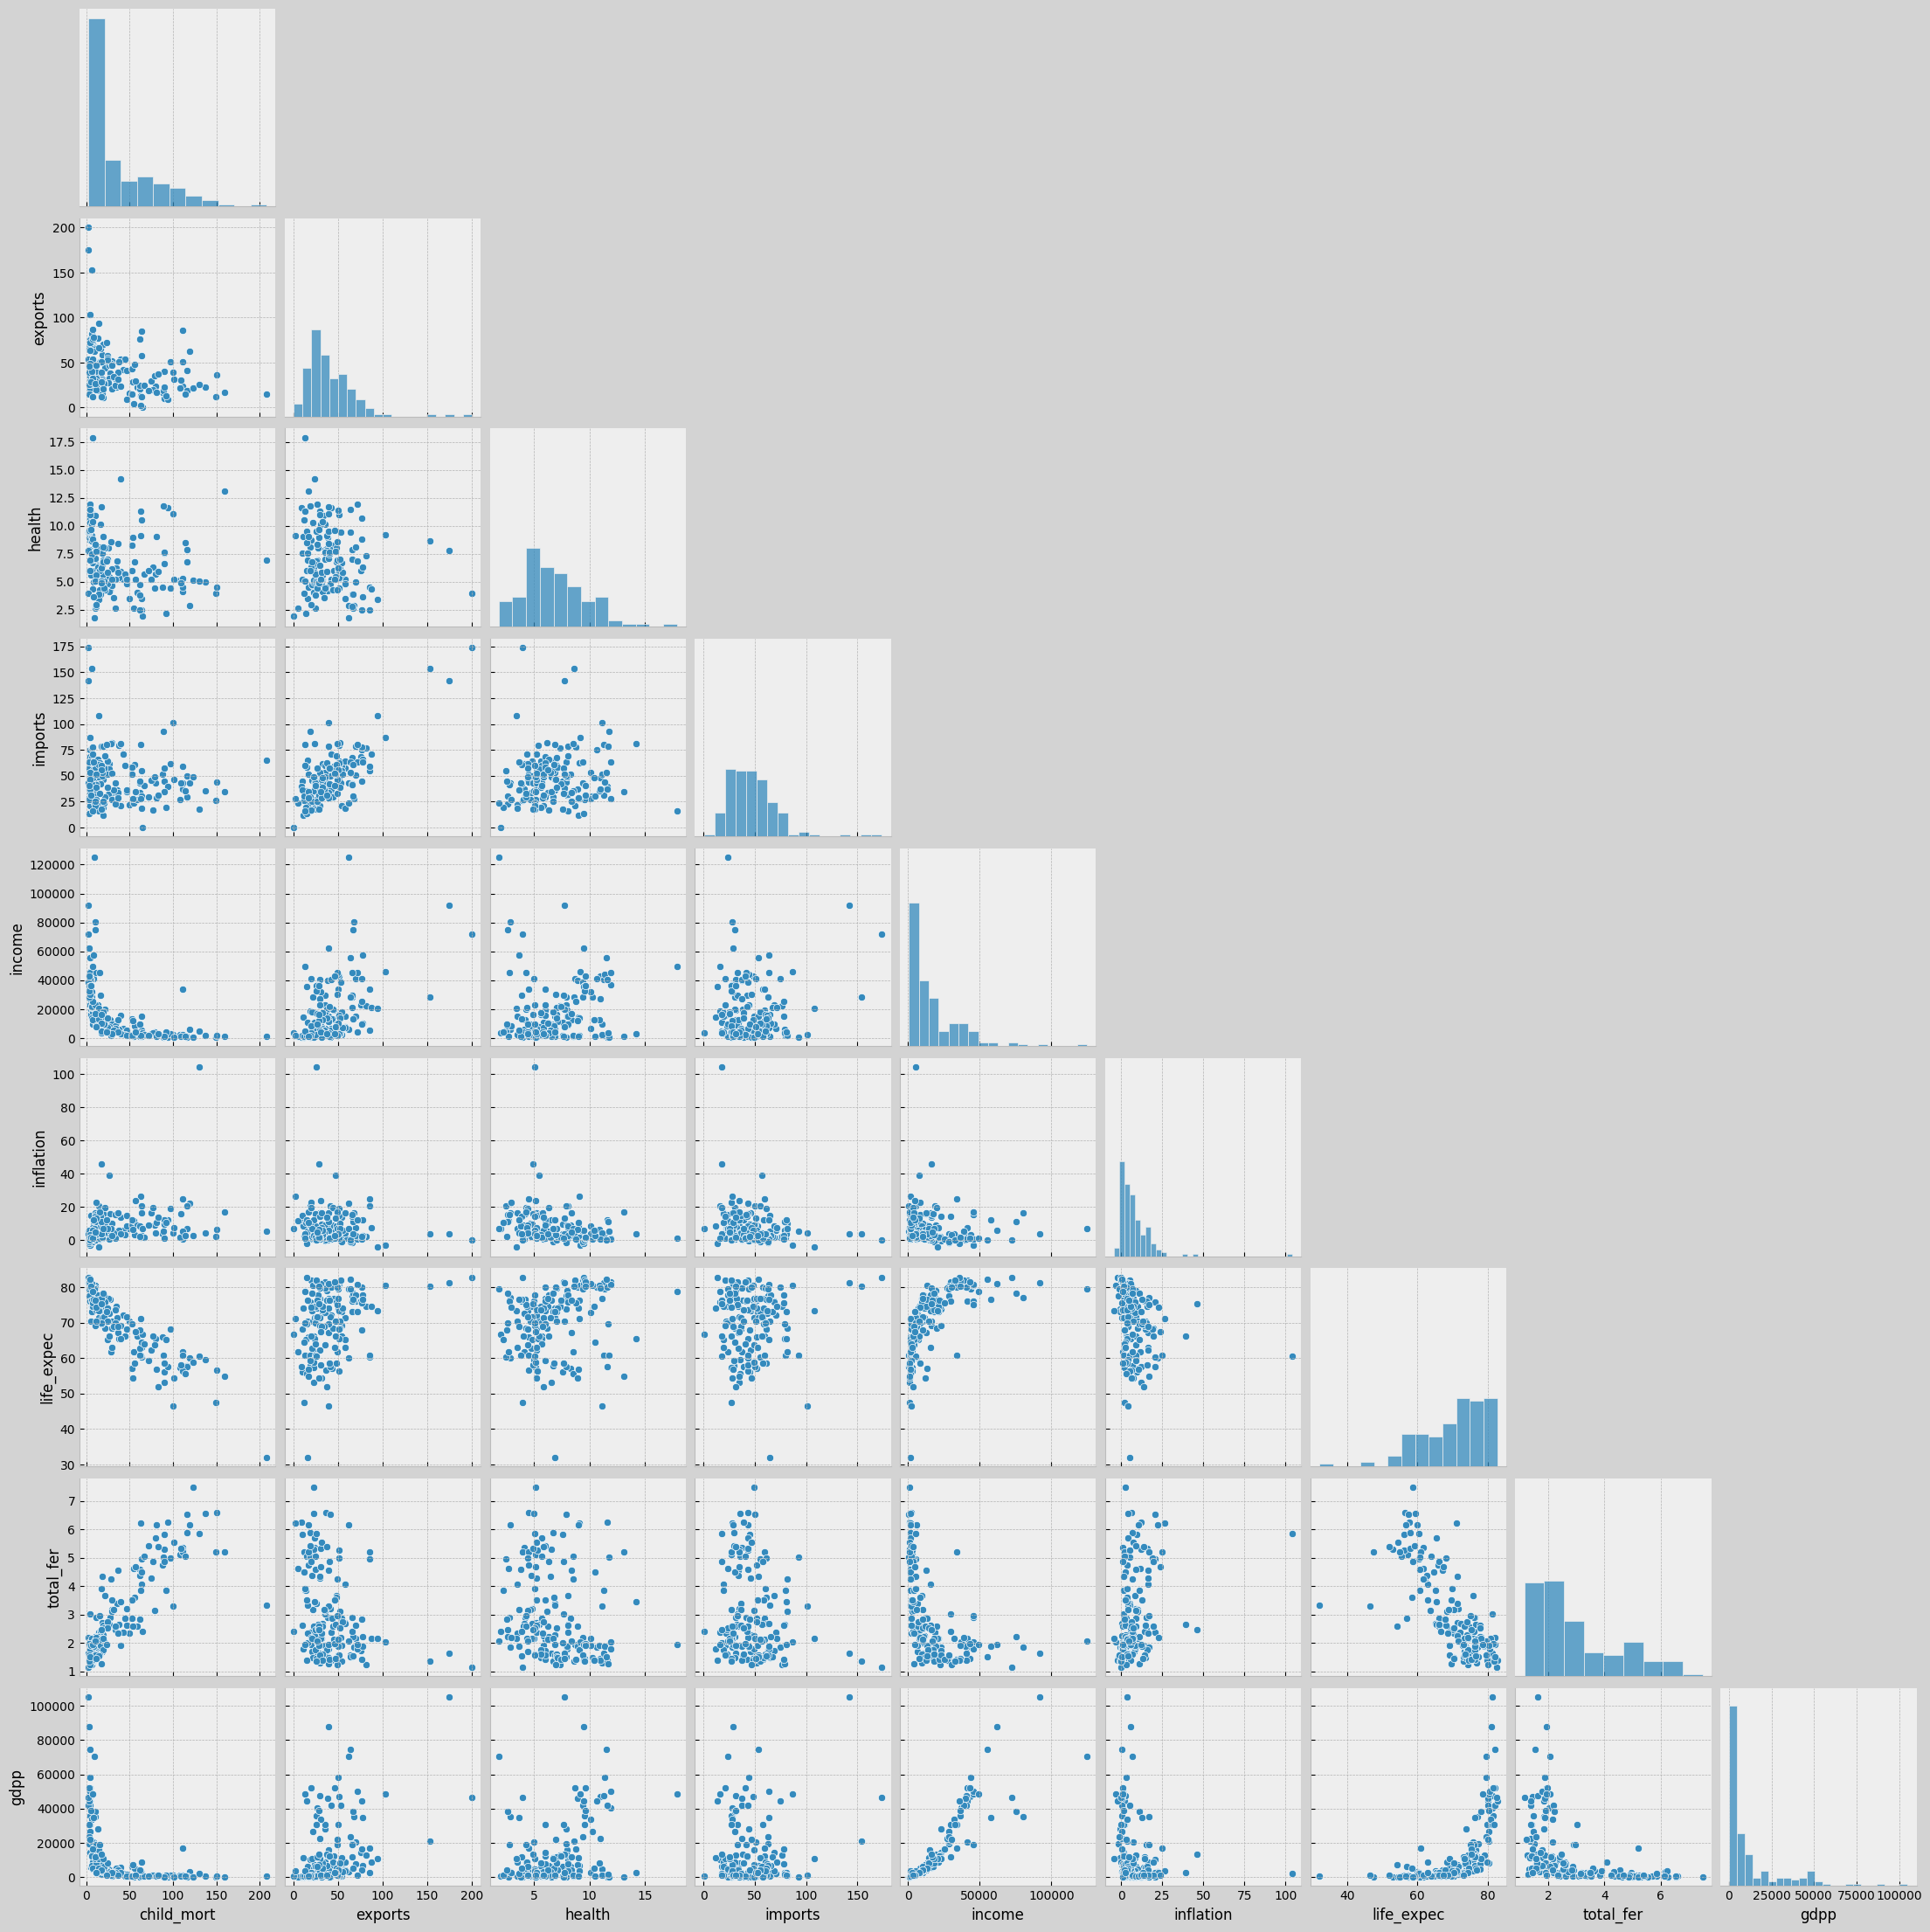

In [ ]:
#another way
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.style.use("bmh")
sns.pairplot(df.drop ("country", axis = 1), corner=True)

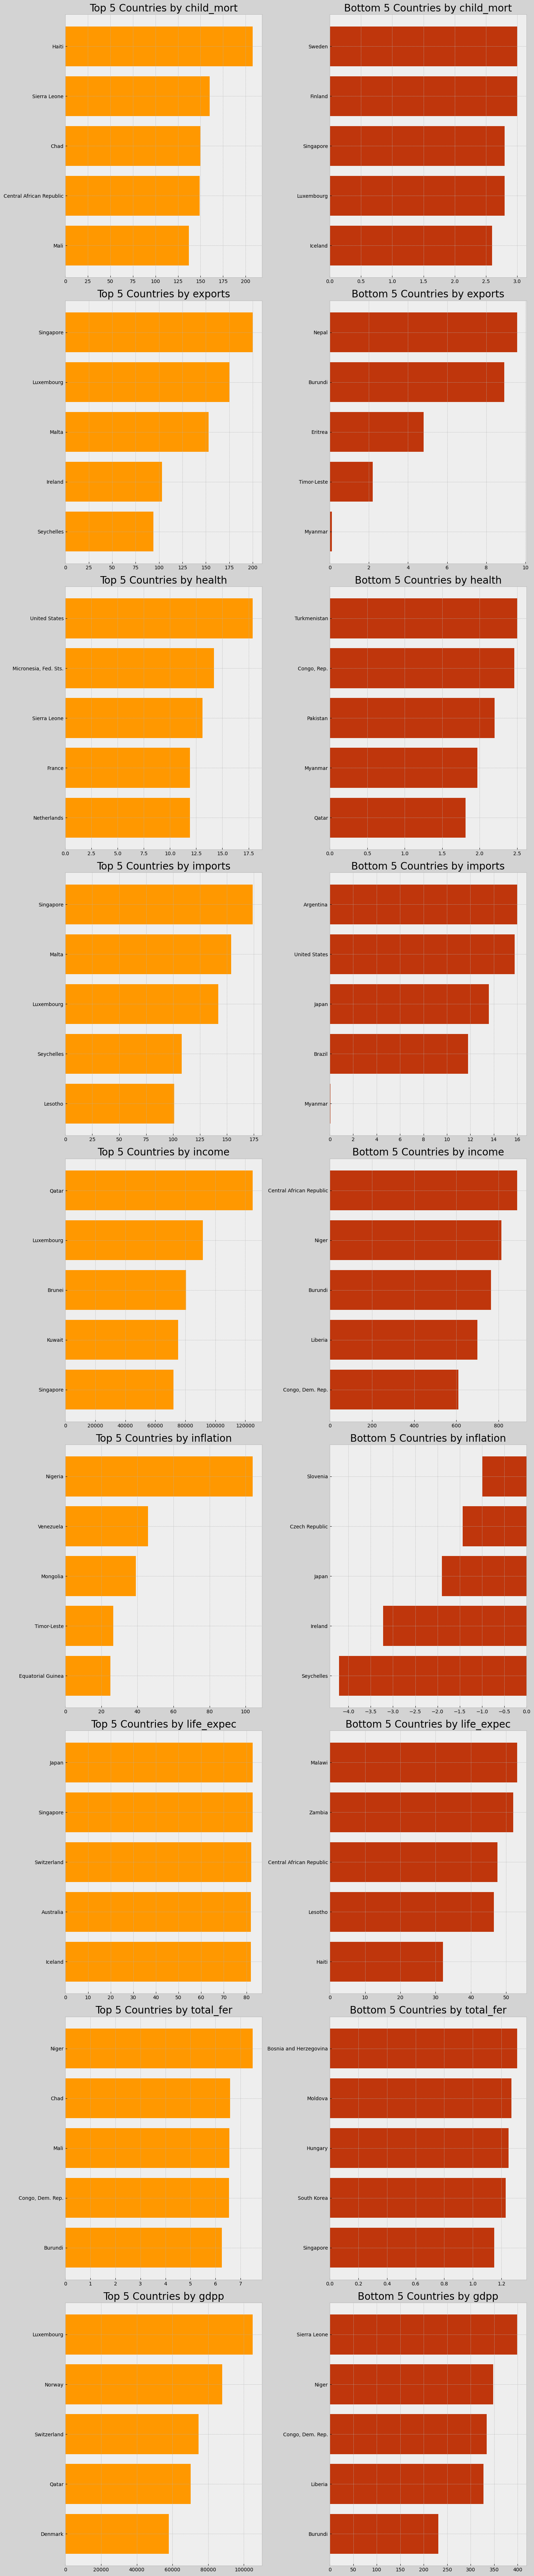

In [ ]:
#plot feature distributions
num_cols = df.select_dtypes(include='number').columns

fig, axs = plt.subplots(len(num_cols), 2, figsize=(15, 8 * len(num_cols)))

for i, col in enumerate(num_cols):

    sorted_df = df.sort_values(col)


    top_df = sorted_df.tail(5)
    axs[i, 0].barh(top_df['country'], top_df[col], color='#ff9800')
    axs[i, 0].set_title(f'Top 5 Countries by {col}', fontsize=20)


    bottom_df = sorted_df.head(5)
    axs[i, 1].barh(bottom_df['country'], bottom_df[col], color='#bf360c')
    axs[i, 1].set_title(f'Bottom 5 Countries by {col}', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [ ]:
# dropping  country column because its contries name and it shouldnt be in our models
df.drop (['country'] , axis = 1 , inplace = True)

In [ ]:
 # scalling the features
scaler = StandardScaler ()
scaled_features = scaler.fit_transform (df)
df_scaled = pd.DataFrame (scaled_features)
df_scaled.columns = df.columns
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


#Dimensionality reduction

In [ ]:
PCA = PCA()
df_PCA = pd.DataFrame(PCA.fit_transform(df_scaled))

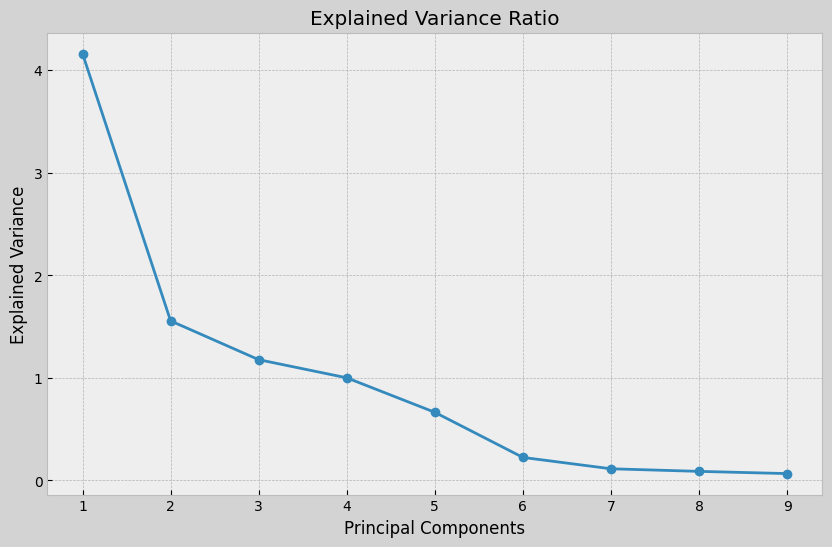

In [ ]:
explained_variance = PCA.explained_variance_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
EVR = PCA.explained_variance_ratio_
PCs = []
for i in range (1 , 10):
    PCs.append(f'PC{i}')

df_EVR = pd.DataFrame({
    'PCs': PCs ,
    'explained_variance_ratio': EVR
})
df_EVR['Cumulative_Variance'] = df_EVR['explained_variance_ratio'].cumsum()
df_EVR

,PCs,explained_variance_ratio,Cumulative_Variance
0,PC1,0.459517,0.459517
1,PC2,0.171816,0.631334
2,PC3,0.130043,0.761376
3,PC4,0.110532,0.871908
4,PC5,0.073402,0.945310
5,PC6,0.024842,0.970152
6,PC7,0.012604,0.982757
7,PC8,0.009813,0.992569
8,PC9,0.007431,1.000000


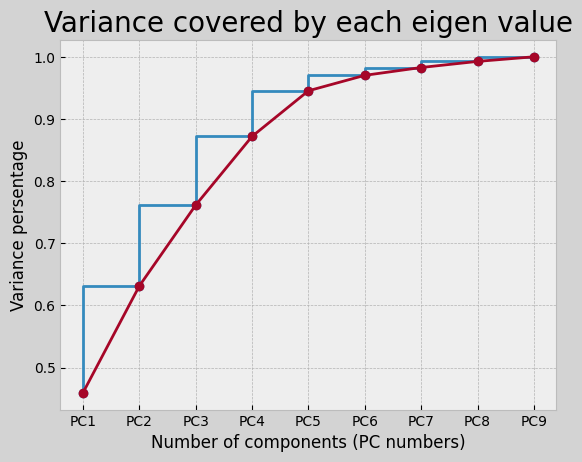

In [ ]:
plt.step (df_EVR.PCs , df_EVR.Cumulative_Variance , marker = 'o')
plt.plot(df_EVR.PCs , df_EVR.Cumulative_Variance , marker = 'o')

plt.title('Variance covered by each eigen value', fontsize = 20)
plt.xlabel('Number of components (PC numbers)')
plt.ylabel('Variance persentage')
plt.show()

**Around 95 % of variance is the usual and good percentage for eigen value
Also the elbow of explained_variance_ratio plot shows us 5 for the number of components
So we could choose n_components=5**

In [ ]:
# making a df by pca 5
from sklearn.decomposition import PCA
pca = PCA (n_components = 5)
pca_df = pd.DataFrame (pca.fit_transform(df_scaled) , columns = ['PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5'])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


#Clustering Metrics Calculation for Different k Values with Silhouette, Calinski-Harabasz, Davies-Bouldin, and Inertia Scores

In [ ]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df)

    score = silhouette_score(pca_df, kmeans.predict(pca_df))
    silhouette.append(score)

    score1 = calinski_harabasz_score(pca_df, kmeans.predict(pca_df))
    calinski_harabasz.append(score1)

    score2 = davies_bouldin_score(pca_df, kmeans.predict(pca_df))
    davies_bouldin.append(score2)

    score3 = kmeans.inertia_
    inertia.append(score3)


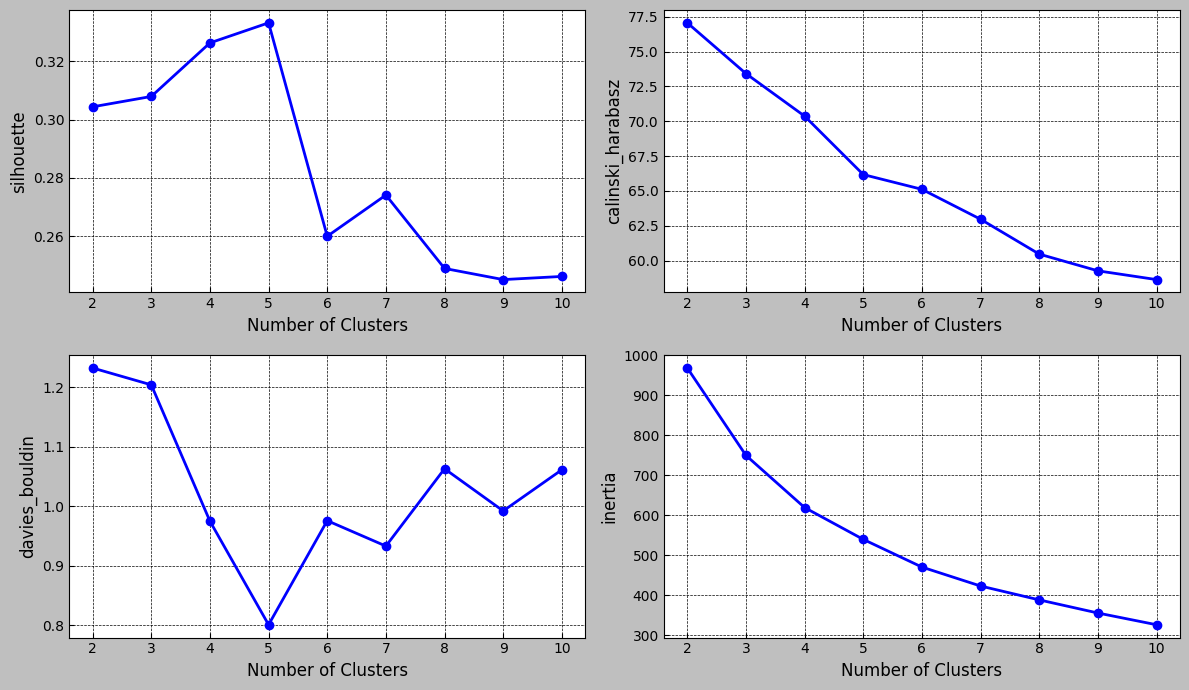

In [ ]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin , 'inertia': inertia}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o',color='blue')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeansV = pca_df.copy ()
kmeans = KMeans (n_clusters = 4 , random_state = 42,n_init=10)
kmeans.fit (pca_df)
kmeansV ['cluster'] = kmeans.predict (pca_df)
kmeansV

,PC1,PC2,PC3,PC4,PC5,cluster
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0
...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,1


In [ ]:
def plot2(data):
    plt.style.use("default")
    custom_colors = ["#583beb", "#3d28a6", '#1e1357', '#070414', '#000000']
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), facecolor='gray')
    ax[0].set_facecolor('#6a757d')

    sns.countplot(x='cluster', data=data, ax=ax[0], color='#583beb')  # Set color for countplot
    for p in ax[0].patches:
        ax[0].annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10),
                       textcoords='offset points')
    ax[0].grid(True)
    ax[0].set_title('Count Plot of Clusters')

    cluster_counts = data['cluster'].value_counts()
    ax[1].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90,
              colors=custom_colors)
    ax[1].set_title('Percentage of Clusters')
    plt.tight_layout()
    plt.show()

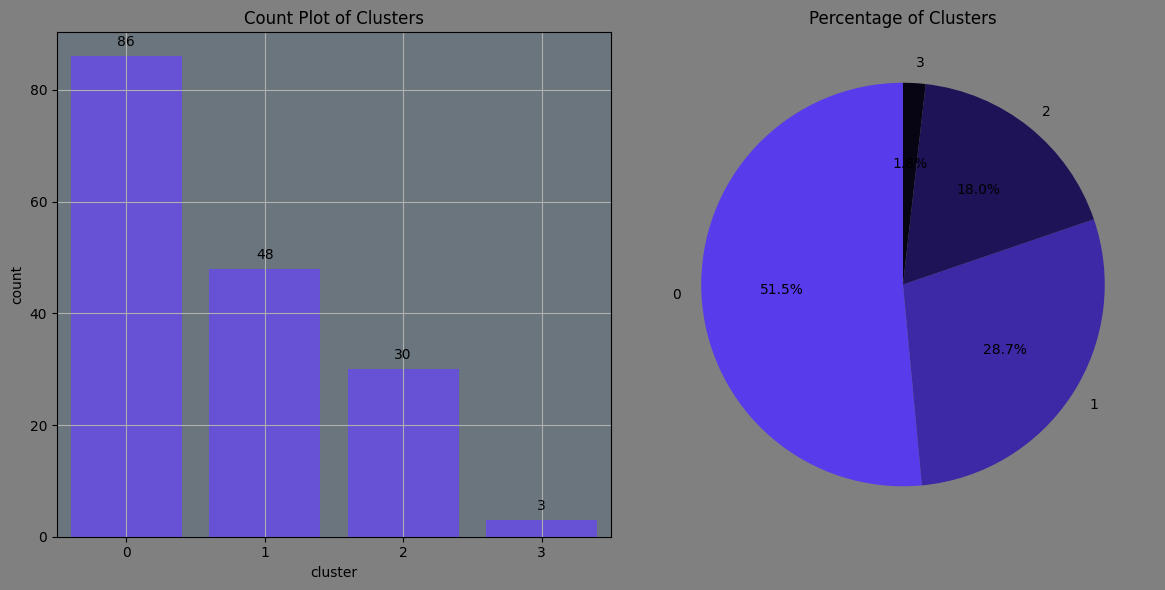

In [ ]:
plot2 (kmeansV)

In [ ]:
cluster_labels = kmeans.fit_predict(df_scaled)
preds = kmeans.labels_
data_df = pd.DataFrame(df)
data_df['KM_Clusters'] = preds
data_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


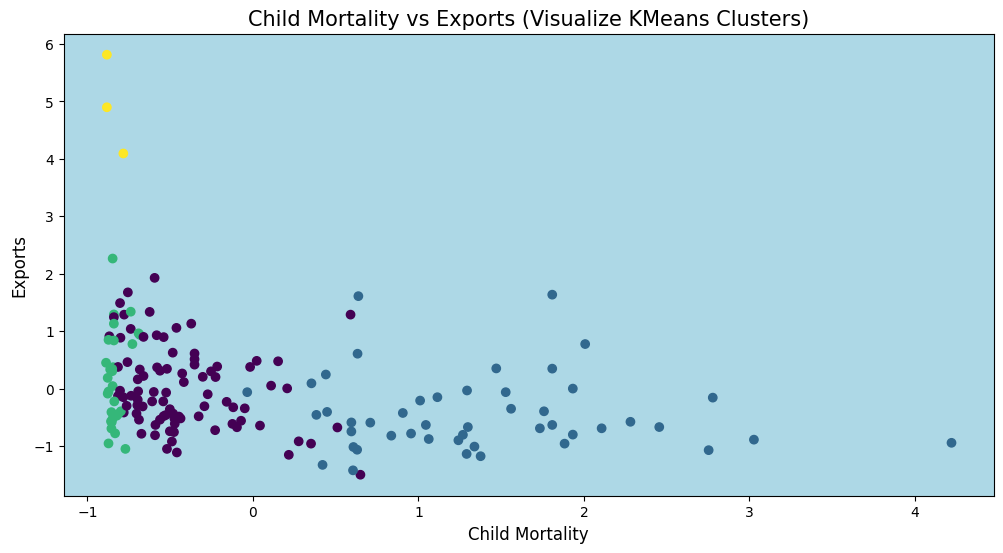

In [ ]:
#Visualize clusters: Feature Pair-1
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=cluster_labels)
plt.title("Child Mortality vs Exports (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("Exports", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.show()

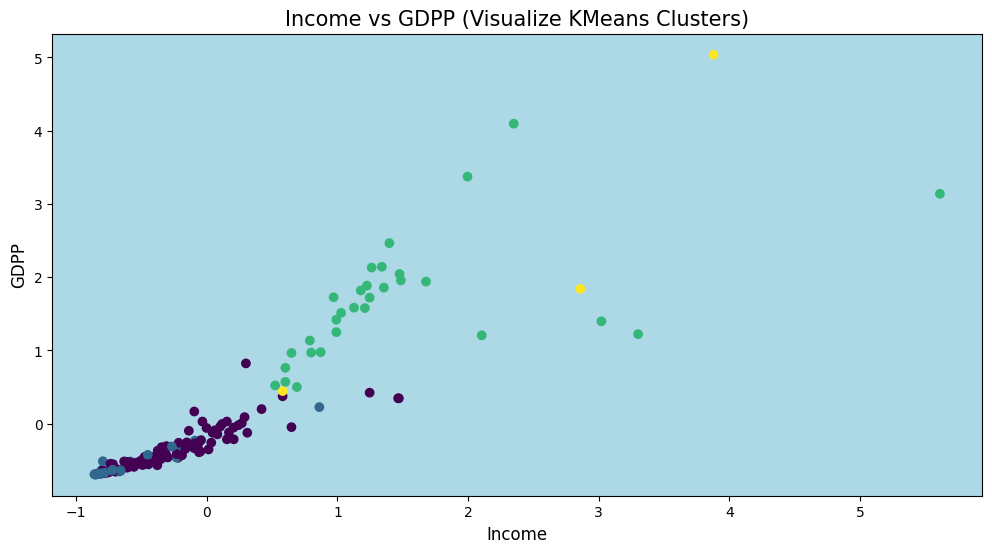

In [ ]:
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled.iloc[:, 4], df_scaled.iloc[:, 8], c=cluster_labels)  # income vs gdpp
plt.title("Income vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.show()

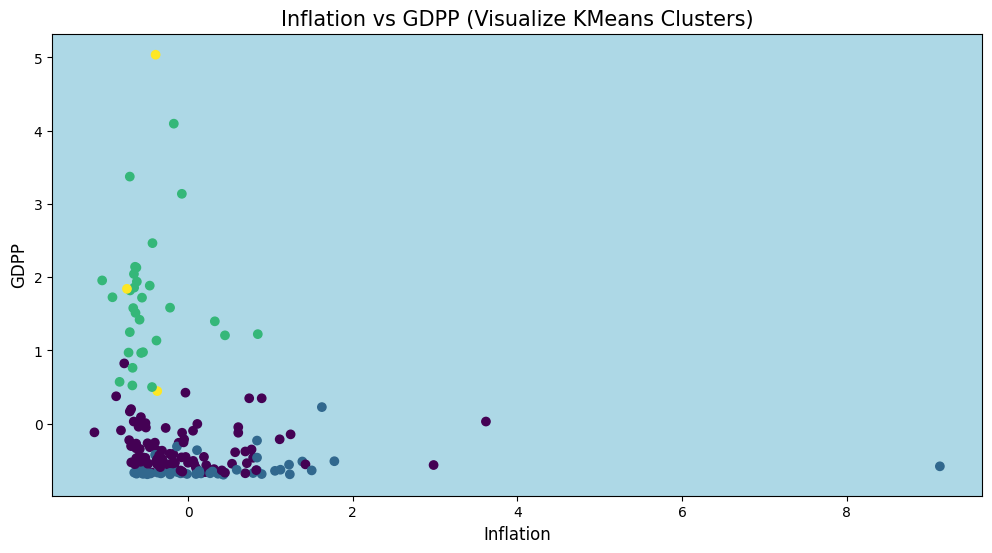

In [ ]:
#Visualize clusters: Feature Pair-3
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled.iloc[:, 5], df_scaled.iloc[:, 8], c=cluster_labels)  # inflation vs gdpp
plt.title("Inflation vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.show()

#Hierarchical Clustering

**Method-1: Dendrogram Plotting using Clustermap**

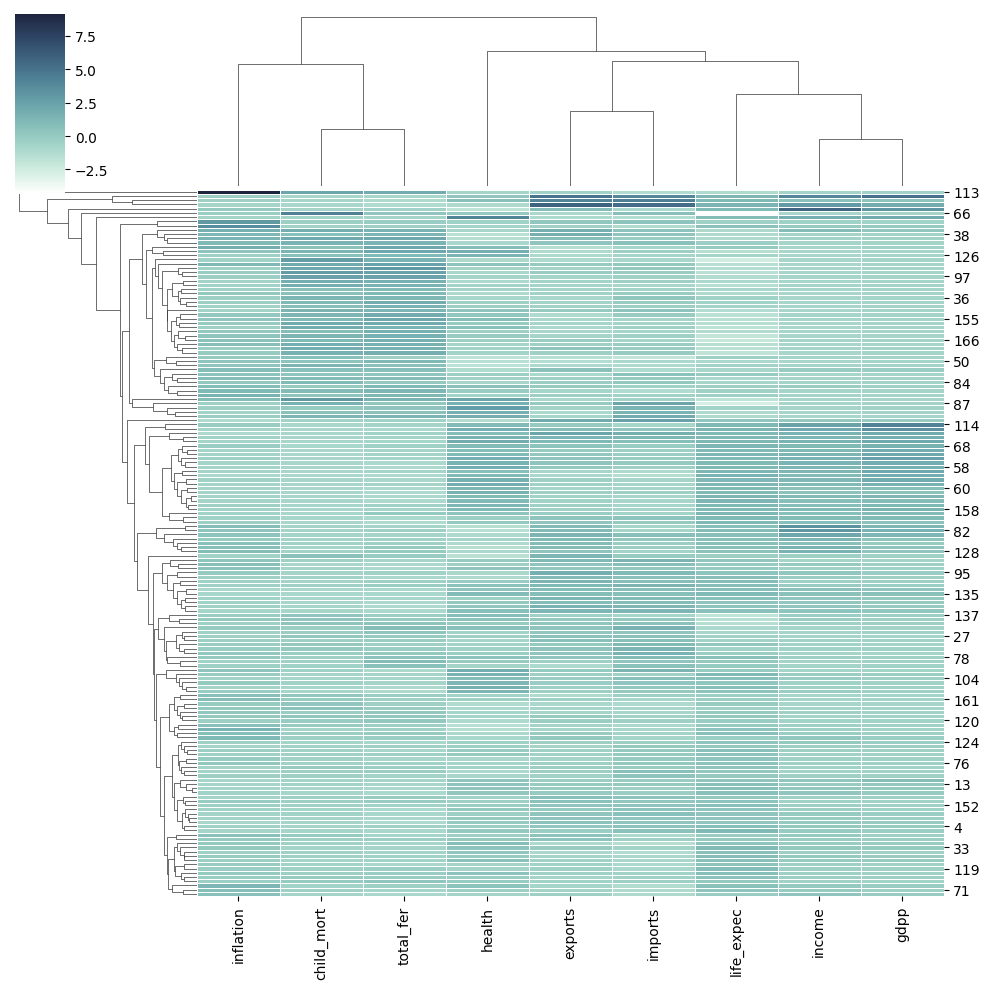

In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(df_scaled, cmap=cmap, linewidths=.5)

**Method-2: Dendrogram Plotting using Ward's Method**

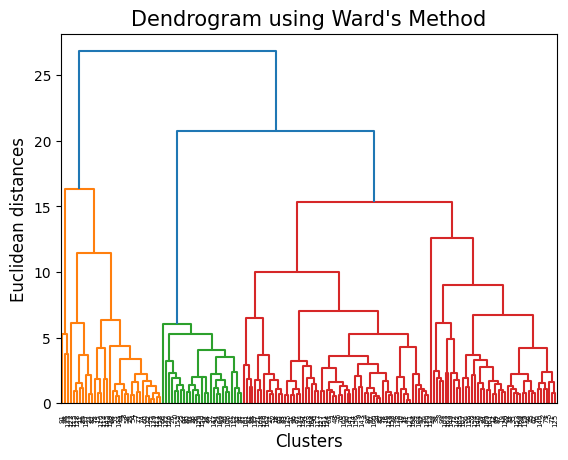

In [ ]:
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(pca_df)

In [ ]:
hcpreds = hc.labels_
data_hc_df = data_df.drop('KM_Clusters', axis=1)
data_hc_df['Hier_Clusters'] = hcpreds
data_hc_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hier_Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


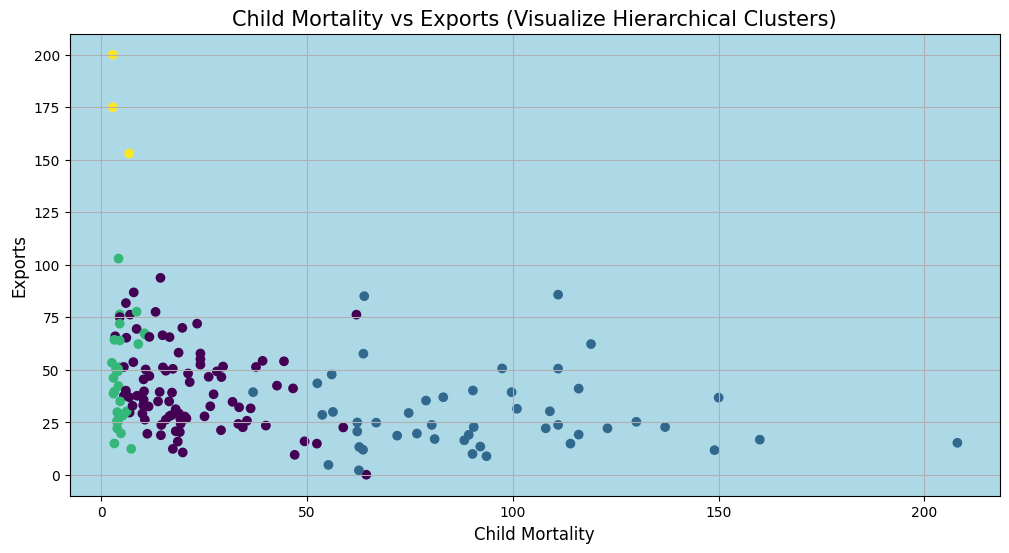

In [ ]:
#Visualize clusters: Feature Pair-1
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12, 6))
plt.scatter(data_hc_df.iloc[:, 0], data_hc_df.iloc[:, 1], c=cluster_labels)
plt.title("Child Mortality vs Exports (Visualize Hierarchical Clusters)", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("Exports", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.show()

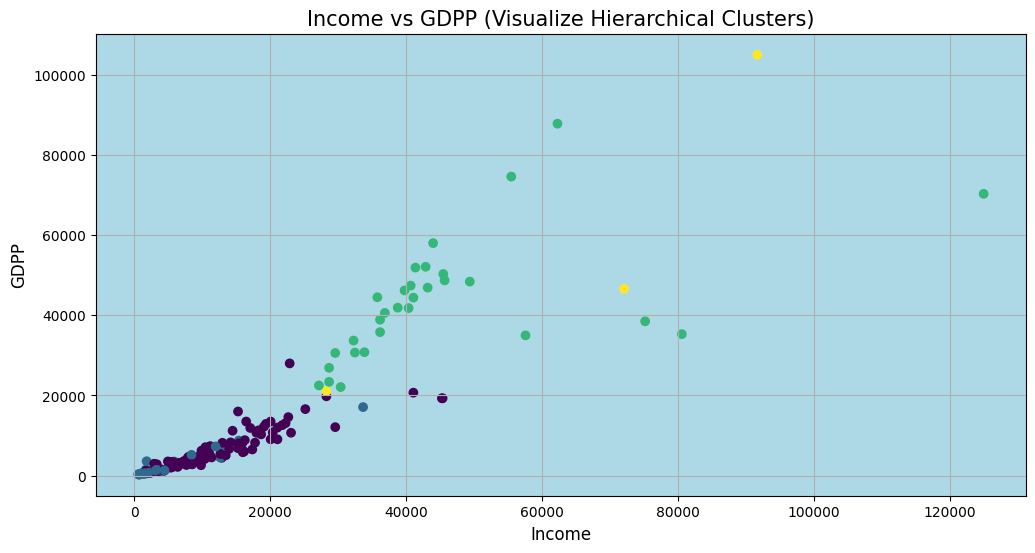

In [ ]:
#Visualize clusters: Feature Pair-2
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12, 6))
plt.scatter(data_hc_df.iloc[:, 4], data_hc_df.iloc[:, 8], c=cluster_labels)  # income vs gdpp
plt.title("Income vs GDPP (Visualize Hierarchical Clusters)", fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.show()

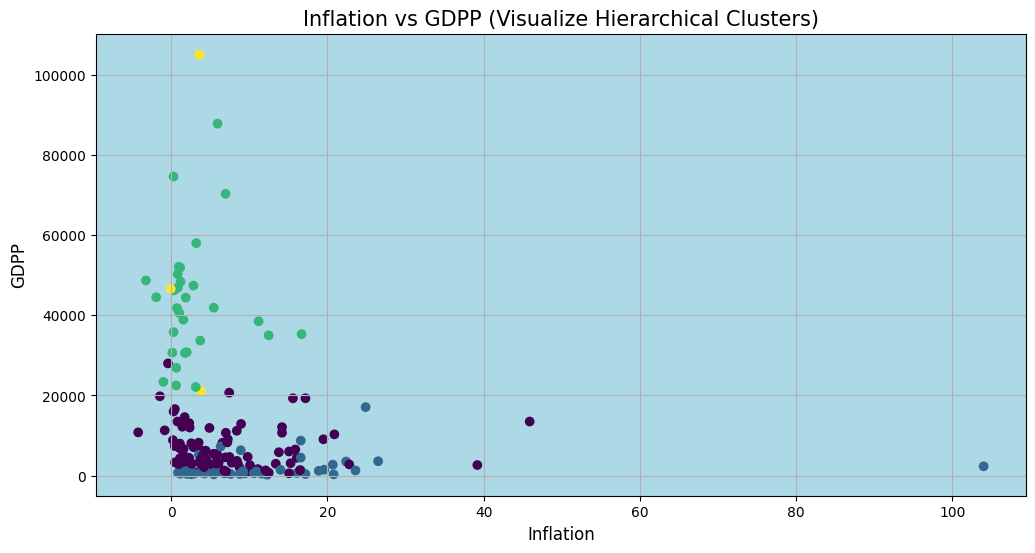

In [ ]:
#Visualize clusters: Feature Pair-3
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12, 6))
plt.scatter(data_hc_df.iloc[:, 5], data_hc_df.iloc[:, 8], c=cluster_labels)  # inflation vs gdpp
plt.title("Inflation vs GDPP (Visualize Hierarchical Clusters)", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.show()